In [10]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
from preprocess_util import stan, pre_process_data, impute_vals

In [13]:
c_hhold_train = pd.read_csv("data/C_hhold_train.csv", index_col='id')

In [14]:
c_hhold_train.head()

,GRGAYimk,DNnBfiSI,cNDTCUPU,GvTJUYOo,vmKoAlVH,LhUIIEHQ,DTNyjXJp,PNAiwXUz,ABnhybHK,yiuxBjHP,...,AJHrHUkH,PaEKIlvv,bFEsoTgJ,ihACfisf,obIQUcpS,lAvdypjD,ARWytYMz,eqJPmiPb,mmoCpqWS,country
id,,,,,,,,,,,,,,,,,,,,,
57211,RslOh,SuNUt,gJLrc,EPKkJ,qKiiE,7,XuMYE,-5,QqETe,umyco,...,laFxs,kBQRJ,qcUVH,AmPtx,YXwVA,jSoky,NwjRA,wnPqZ,52,C
62519,jPUAt,boDkI,gJLrc,EPKkJ,YXkKd,7,XuMYE,331,sEJgr,yYwlq,...,laFxs,kBQRJ,eusFW,AmPtx,LSPRW,jSoky,NwjRA,wnPqZ,100,C
11614,OpTiw,boDkI,vURog,EPKkJ,qKiiE,9,XuMYE,-1,sEJgr,umyco,...,laFxs,oUXSJ,eusFW,AmPtx,YXwVA,jSoky,NwjRA,wnPqZ,70,C
6470,RslOh,VgxgY,gJLrc,EPKkJ,YXkKd,9,zfhKi,-5,sEJgr,umyco,...,laFxs,kBQRJ,jqrBN,AmPtx,YXwVA,jSoky,NwjRA,wnPqZ,10,C
33558,IXFlv,VgxgY,kPTaD,EPKkJ,YXkKd,9,XuMYE,23,sEJgr,umyco,...,laFxs,kBQRJ,eusFW,AmPtx,LSPRW,jSoky,herus,wnPqZ,-5,C


In [15]:
c_hhold_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6469 entries, 57211 to 7646
Columns: 164 entries, GRGAYimk to country
dtypes: bool(1), float64(1), int64(29), object(133)
memory usage: 8.1+ MB


In [17]:
c_hhold_train.select_dtypes(include=("int64","float64")).head()

,LhUIIEHQ,PNAiwXUz,jmsRIiqp,NONtAKOM,kLAQgdly,WWuPOkor,CtFxPQPT,GIwNbAsH,qLDzvjiU,detlNNFh,...,kiAJBGqv,aFKPYcDt,gAZloxqF,phbxKGlB,nTaJkLaJ,ZZGQNLOX,snkiwkvf,POJXrpmn,vSqQCatY,mmoCpqWS
id,,,,,,,,,,,,,,,,,,,,,
57211,7,-5,8,-10,-500,5,-8,-3,0,-1,...,1,-9,-9,-605,5,-19,-100,2,196,52
62519,7,331,8,-4,-410,5,-596,-3,0,-1,...,-1,-9,-849,-767,593,-13,-520,2,250,100
11614,9,-1,15,2,-10,5,-8,-6,1,-1,...,0,-9,-39,-677,26,-25,-34,2,7,70
6470,9,-5,1,2,-10,5,-22,-6,-1,-1,...,0,-9,-9,-20,-2,-13,-16,2,175,10
33558,9,23,15,-10,-325,0,-1,-6,0,8,...,2,-9,-1039,-938,-2,-13,-634,2,307,-5


In [18]:
c_filled = impute_vals(c_hhold_train)

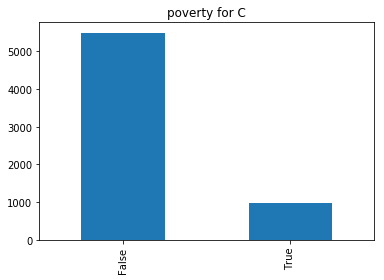

In [19]:
c_filled.poor.value_counts().plot.bar(title="poverty for C")

In [20]:
c_filled_Y = c_filled.poor

In [21]:
c_filled.drop('poor', axis=1, inplace=True)

In [22]:
c_filled_X = pre_process_data(c_filled)

input shape	(6469, 163)
After standardization	(6469, 163)
After one hot encoding of categoricals	(6469, 795)


In [24]:
cX_resampled, cY_resampled = SMOTE().fit_sample(c_filled_X, c_filled_Y)

In [26]:
print(Counter(cY_resampled).items())

dict_items([(False, 5496), (True, 5496)])


In [27]:
cX_resampled.shape

(10992, 795)

In [28]:
cY_resampled.shape

(10992,)

In [29]:
cY_resampled = cY_resampled.reshape(1,10992)

In [30]:
cY_resampled.shape

(1, 10992)

# BUILD MODEL